<a href="https://colab.research.google.com/github/gse-unil/2024_Geoinformatique_I/blob/main/Geoinformatique_I/SIG/Tutoriel_SIG/S9_SIG_tutoriel/S9_SIG_tutoriel_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

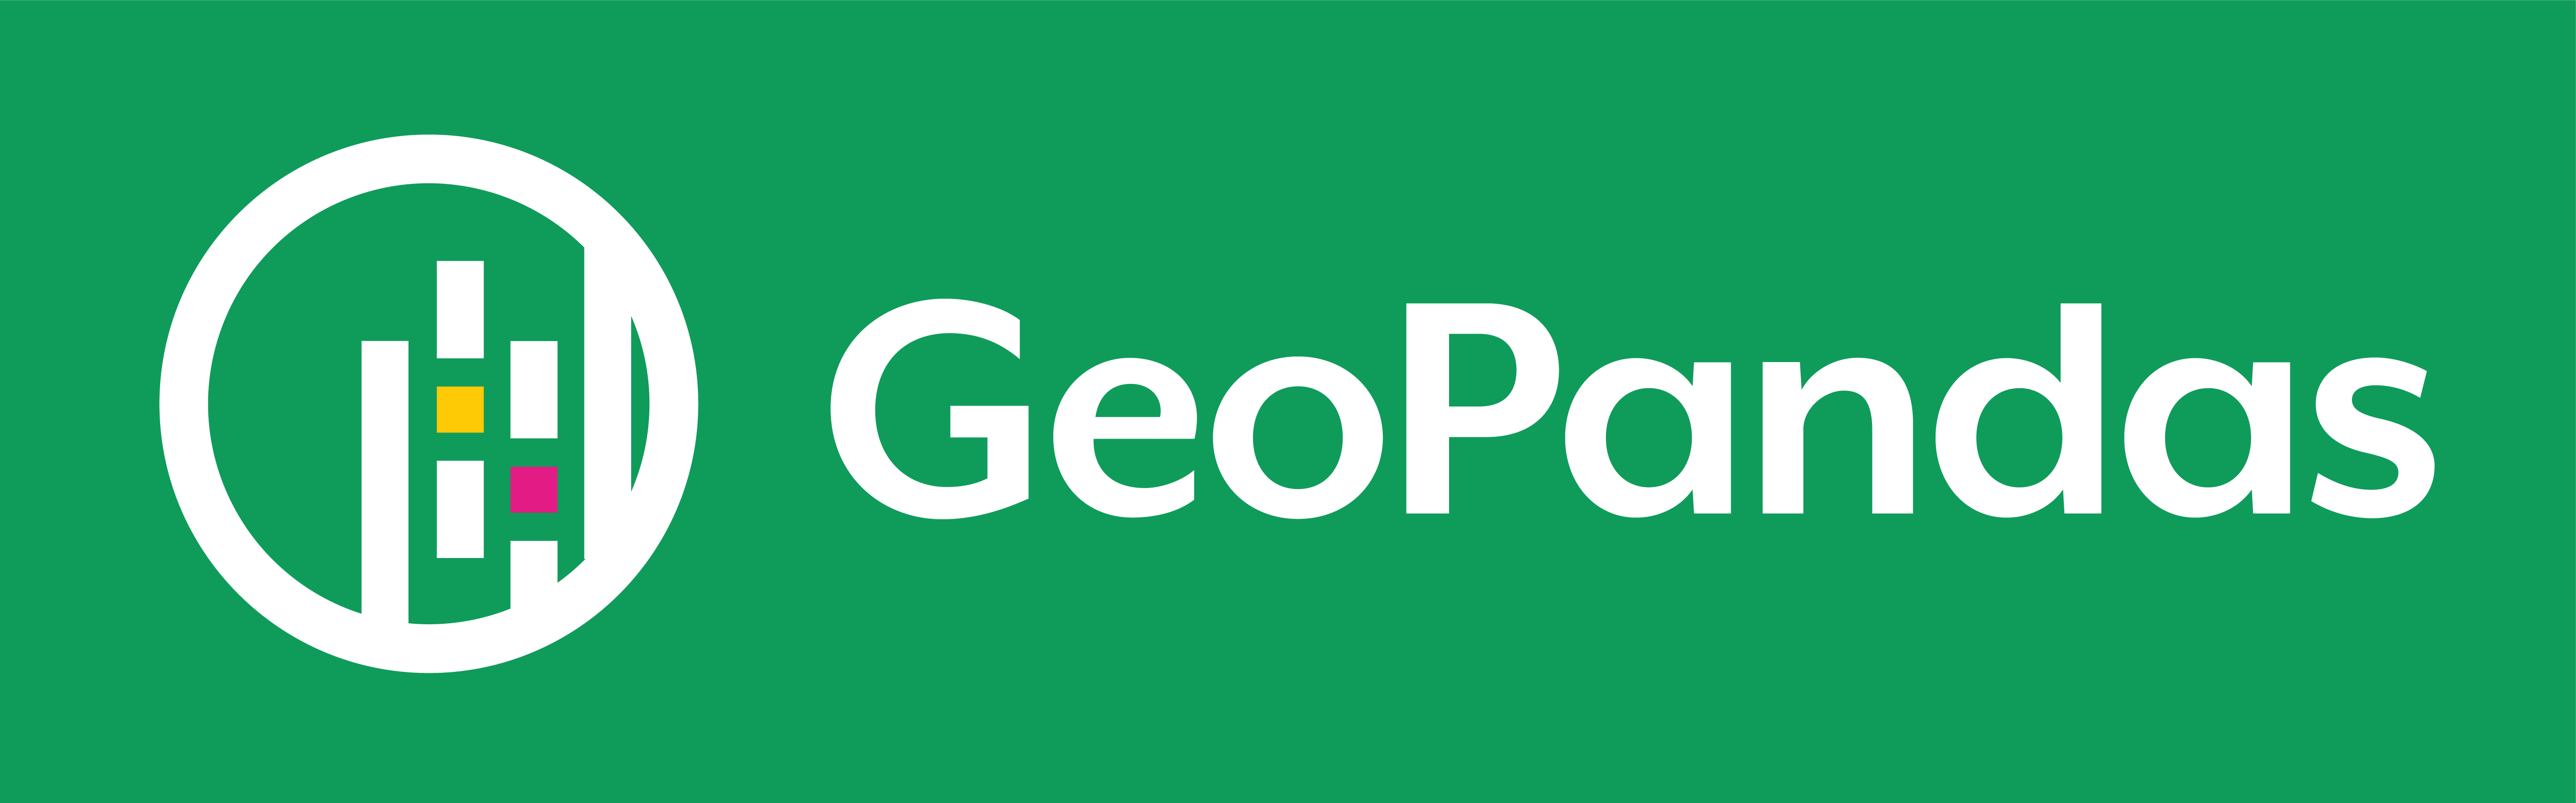

## Installation de GeoPandas
Veuillez exécuter les blocs de code suivants dans cette section pour :
* Installer les dépendances de GeoPandas et GeoPandas
* Télécharger et décompresser les données utilisées dans ce carnet.
* Importer GeoPandas et les autres modules requis pour le carnet de notes

In [1]:
#Installer les dépendances du GeoPandas
!pip install --upgrade pyshp

!pip install --upgrade shapely

!pip install --upgrade descartes

!pip install --upgrade rtree

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 8.0 MB/s eta 0:00:00


In [2]:
#Installer GeoPandas

!pip install --upgrade geopandas

In [3]:
# Pooch Code
import pooch
datafile = pooch.retrieve('https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/Efg089STo25Gq6N_BBn_qGoBIsAOd2yUNBgeTfPR2wxw4g?download=1',
                          known_hash='84d455fb96dc8f782fba4b5fbe56cb8970cab678f07c766fcba1b1c4674de1b1')

In [4]:
#Importer GeoPandas et les autres modules nécessaires pour le notebook
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Références :    
1. Site officiel de Geopandas : Introduction à GeoPandas
https://geopandas.org/en/stable/getting_started/introduction.html   
2. Automatisation des processus SIG
https://autogis-site.readthedocs.io/en/latest/notebooks/L2/01-geopandas-basics.html    
3. Utiliser les données pour les sciences de la terre et de l'environnement en Open Source Python
https://www.earthdatascience.org/courses/use-data-open-source-python/
4. Manuel d'utilisation de Shapely
https://shapely.readthedocs.io/en/stable/manual.html
5. Analyse géospatiale avec Python et R
https://kodu.ut.ee/~kmoch/geopython2020/index.html
6. Introduction aux données géospatiales en Python
https://www.datacamp.com/tutorial/geospatial-data-python

**Objectifs d'apprentissage**

1. Comprendre la structure des données de GeoPandas
2. Lire et écrire des données géospatiales avec GeoPandas
3. Accéder aux attributs et aux méthodes des données géospatiales à l'aide de GeoPandas
4. Effectuer des opérations spatiales avec GeoPandas

**GéoPandas** étend la bibliothèque de science des données pandas pour les données géospatiales en combinant :
**Pandas** : analyse de données
**Shapely** : manipulation de géométries (analyse spatiale déterministe - manipulations théoriques d'éléments planaires)
**Fiona** : lecture et écriture de fichiers
**pyproj** : gestion des systèmes de référence de coordonnées
**matplotlib** : traçage.

## Structure des données Geopandas
* La principale différence entre GeoDataFrame et DataFrame est que GeoDataFrame contient au moins une colonne **'geometry'**, qui contient des objets de forme, par exemple des points, des lignes, des polygones, des multipolygones, etc.

In [5]:
### Créer un GeoPandas GeoDataFrame à partir d'un Pandas DataFrame avec des coordiantes
### Tutoriel : https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html

## Créer un DataFrame Pandas à partir du csv utilisé dans l'exercice Pandas
# path = r'/content/data/usgs_earthquakes_2014.csv'

# Option pooch
df_earthquakes = pd.read_csv(datafile)

In [6]:
#Jetez un coup d'œil au DataFrame Pandas
df_earthquakes.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,ml,4.0,171.43,0.342,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake


In [7]:
# Créer un GeoDataFrame GeoPandas à partir d'un DataFrame Pandas
gdf_earthquakes = gpd.GeoDataFrame(df_earthquakes,
                                   geometry=gpd.points_from_xy(df_earthquakes.longitude,
                                                               df_earthquakes.latitude))

In [8]:
# Jetez un coup d'œil au GeoPandas GeoDataFrame et remarquez la colonne 'géométrie'.
gdf_earthquakes.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,geometry
0,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,POINT (-152.7081 60.252)
1,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,ml,4.0,171.43,0.342,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,POINT (-115.1309 37.0703)


* La structure de données principale est **geopandas.GeoDataFrame**, une sous-classe de pandas.DataFrame.

In [9]:
# Voir le type du geodataframe
type(gdf_earthquakes)

geopandas.geodataframe.GeoDataFrame

**geopandas.GeoSeries** est une sous-classe de pandas.Series. GeoSeries peut contenir n'importe quel type de géométrie et possède un attribut `GeoSeries.crs` (Coordinate Reference System) pour la projection.

In [10]:
# Voir le type d'une colonne dans le geodataframe
type(gdf_earthquakes['time'])

pandas.core.series.Series

* **GeoDataFrame combine** pandas.Series avec des données traditionnelles (numériques, booléennes, textuelles, etc.) et geopandas.GeoSeries, ce qui permet de travailler avec des données géospatiales.

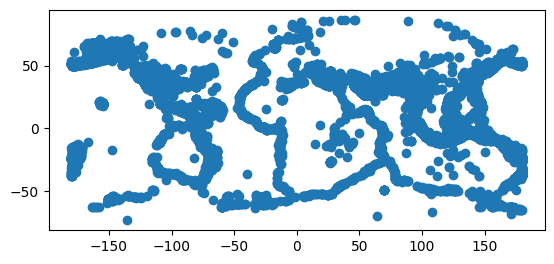

In [11]:
# jeter un coup d'œil rapide sur les données géospatiales contenues dans le GeoDataFrame sur une carte
ax = gdf_earthquakes.plot()

## Lire et écrire des fichiers

### Lecture de fichiers
* En supposant que vous ayez un fichier contenant à la fois des données et de la géométrie (par exemple GeoPackage, GeoJSON, Shapefile), vous pouvez le lire en utilisant `geopandas.read_file()`, qui détecte automatiquement le type de fichier et crée un GeoDataFrame.

In [12]:
# Définir le chemin d'accès au fichier
path = r"/content/data/damselfish-data/DAMSELFISH_distributions.shp"

In [13]:
# Lire les données dans un GeoDataFrame
gdf_DAMSELFISH = gpd.read_file(path)

DataSourceError: /content/data/damselfish-data/DAMSELFISH_distributions.shp: No such file or directory

### GeoPandas pour le traitement des données spatiales au format vectoriel

* Trois types fondamentaux d'objets **géométriques** (le modèle de données spatiales implémenté par shapely & défini par *interieur, limite et extérieur*) :

  * **Point** : Un point unique défini par une paire de coordonnées x, y, par exemple l'emplacement des arbres.
        * Classe de point *Intérieur* - exactement un point. *Limite* - exactement aucun point. *Extérieur* - tous les autres points
   * **Ligne** : Au moins deux points connectés, par exemple des routes, des cours d'eau, etc.
        * Classes *LineString et LinearRing*. *Intérieur* - l'infinité de points le long de la ligne. *Limite* - Deux points d'extrémité. *Extérieur* - tous les autres points.
   * **Polygone** : Au moins trois points reliés et fermés par des lignes, par exemple les frontières des lacs, des pays.
        * *Classe de polygone*. *Intérieur* - l'infinité de points à l'intérieur. *Limite* - une ou plusieurs lignes. *Extérieur* - tous les autres points.  

In [ ]:
# Vérifier le type de données
type(gdf_DAMSELFISH)

In [ ]:
# Jetez un coup d'œil rapide aux données
gdf_DAMSELFISH.head(3)

In [ ]:
# Regarder les géométries dans le GeoDataFrame
gdf_DAMSELFISH['geometry'].head(3)

In [ ]:
# Voir le type d'objets géométriques dans les données
type(gdf_DAMSELFISH.iloc[0]['geometry'])

In [ ]:
# Voir les objets géométriques dans les données
gdf_DAMSELFISH.iloc[0]['geometry']

In [ ]:
# Jetez un coup d'œil rapide aux données sur une carte
ax = gdf_DAMSELFISH.plot()

### Ecriture de fichiers
* Pour écrire un GeoDataFrame dans un fichier, utilisez GeoDataFrame.to_file(). Le format de fichier par défaut est Shapefile, mais vous pouvez spécifier votre propre format avec le mot-clé driver.

In [ ]:
# Créer un chemin de sortie pour les données
out_file_path = r"/content/data/damselfish-data/DAMSELFISH_distributions_SELECTION.shp"

# Sélectionner les 50 premières lignes, c'est la syntaxe numpy/pandas pour ``slice``
# découpe un dataframe ou un tableau, de la position 0 jusqu'à (en excluant) 50
selection = gdf_DAMSELFISH[0:50]

# Inscrire ces lignes dans un nouveau fichier Shapefile (le format de fichier de sortie par défaut est Shapefile)
selection.to_file(out_file_path)

## Attributs et méthodes


### Surface et distance

* Pour mesurer la surface de chaque polygone (ou MultiPolygon dans ce cas précis), accédez à l'attribut [`GeoDataFrame.area`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.area.html), qui renvoie une pandas.Series. Notez que `GeoDataFrame.area` est juste `GeoSeries.area` appliqué à la colonne géométrique active.
* La distance euclidienne entre les points est accessible en utilisant `GeoDataFrame.distance`, qui appelle [`GeoDataFrame.distance`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.distance.html) pour mesurer la distance du point d'intérêt.


In [ ]:
# Calculer et stocker les aires des polygones individuels
gdf_DAMSELFISH['area'] = gdf_DAMSELFISH.area
gdf_DAMSELFISH['area'].head(3)

### Limite et centroïde

* Pour obtenir la limite de chaque polygone (LineString), accédez à l'attribut [`GeoDataFrame.boundary`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.boundary.html).
* Le centroïde d'une géométrie donnée (ligne, polygone, etc.) est accessible via l'attribut [`.centroid`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.centroid.html).


In [ ]:
# Obtenir la limite de chaque polygone
gdf_DAMSELFISH['boundary'] = gdf_DAMSELFISH.boundary
gdf_DAMSELFISH['boundary'].head(3)

In [ ]:
# Obtenir le centroïde de chaque polygone
gdf_DAMSELFISH['centroid'] = gdf_DAMSELFISH.centroid
gdf_DAMSELFISH['centroid'].head(3)

In [ ]:
# Mesurer la distance entre chaque centroïde et le premier centroïde
first_point = gdf_DAMSELFISH['centroid'].iloc[0]
gdf_DAMSELFISH['distance'] = gdf_DAMSELFISH['centroid'].distance(first_point)
gdf_DAMSELFISH['distance'].head(3)

### Projection

* Les [systèmes de référence de coordonnées (CRS)] (https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.crs.html) sont importants car les formes géométriques d'un GeoDataFrame sont simplement une collection de coordonnées dans un espace arbitraire. Un CRS indique à Python comment ces coordonnées sont liées à des endroits sur la Terre. Une projection cartographique (ou un système de coordonnées projetées) est une transformation systématique des latitudes et des longitudes en une surface plane où les unités sont généralement représentées en mètres (au lieu de degrés décimaux).

* Comme les projections cartographiques des couches SIG sont souvent définies différemment (c'est-à-dire qu'elles ne correspondent pas), il est courant de redéfinir les projections cartographiques pour qu'elles soient identiques dans les deux couches. Il est important que les couches aient la même projection car cela permet d'analyser les relations spatiales entre les couches, par exemple en effectuant la requête spatiale Point in Polygon.
* Le numéro EPSG (« European Petroleum Survey Group ») est un code qui indique le système de coordonnées du jeu de données.

In [ ]:
# Lecture des données du fichier Europe_borders.shp
path =  r"/content/data/Europe_borders/Europe_borders.shp"
gdf_Europe_borders = gpd.read_file(path)

In [ ]:
# Voir le système de référence de coordonnées actuel à partir de l'attribut .crs
gdf_Europe_borders.crs

In [ ]:
# Convert (aka reproject) into Lambert Azimuthal Equal Area projection (EPSG : 3035)
gdf_Europe_borders_proj = gdf_Europe_borders.to_crs(epsg=3035)

In [ ]:
# Voir le système de référence de coordonnées actuel de l'attribut .crs
gdf_Europe_borders_proj.crs

### Plot
* GeoPandas peut tracer des cartes, ce qui nous permet de vérifier comment les géométries apparaissent dans l'espace. Pour tracer la géométrie active, appelez [GeoDataFrame.plot()](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.plot.html).

In [ ]:
# Plot les GeoDataFrames
# Comprendre la différence entre les projections
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
# Tracer le WGS84
gdf_Europe_borders.plot(facecolor='gray', ax=axs[0]) ;

# Ajouter un titre
axs[0].set_title(« WGS84 CRS », y=1.05) ;

# Plot celle avec la projection ETRS-LAEA
gdf_Europe_borders_proj.plot(facecolor='blue', ax=axs[1]) ;

# Ajouter un titre
axs[1].set_title(« ETRS Lambert Azimuthal Equal Area projection », y=1.05) ;

# Supprimer l'espace blanc autour du graphique
fig.tight_layout()

## Relations et opérations spatiales

## Manipulations géométriques
GeoPandas met à disposition tous les outils de manipulation géométrique de la bibliothèque shapely : buffer, boundary, convex_hull, envelope, unary_union


In [ ]:
# Tutoriel : https://geopandas.org/en/stable/docs/user_guide/geometric_manipulations.html

# Générer une GeoSeries contenant 2000 points aléatoires
import numpy as np
from shapely.geometry import Point
xmin, xmax, ymin, ymax = 900000, 1080000, 120000, 280000
xc = (xmax - xmin) * np.random.random(2000) + xmin
yc = (ymax - ymin) * np.random.random(2000) + ymin
pts = gpd.GeoSeries([Point(x, y) for x, y in zip(xc, yc)])

In [ ]:
# Dessine un cercle de rayon fixe autour de chaque point
circles = pts.buffer(2000)

In [ ]:
# Réunir ces cercles en une seule géométrie MultiPolygon avec unary_union
# https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.unary_union.html
mp = circles.unary_union

In [ ]:
# Voir multipolygone unifié
mp

In [ ]:
# Vérifier le type du multipolygone unifié
type(mp)

### Set-Operations avec superposition

Lorsque l'on travaille avec plusieurs jeux de données spatiales - en particulier plusieurs jeux de données de polygones ou de lignes - les utilisateurs souhaitent souvent créer de nouvelles formes basées sur les endroits où ces jeux de données se chevauchent (ou ne se chevauchent pas). Ces manipulations sont souvent effectuées en utilisant le langage des ensembles - intersections, unions et différences. Ces types d'opérations sont disponibles dans la bibliothèque geopandas à travers la méthode [overlay()](https://geopandas.org/en/stable/docs/user_guide/set_operations.html?highlight=overlay).

In [ ]:
# Tutoriel : https://geopandas.org/en/stable/docs/user_guide/set_operations.html
# Créer quelques données d'exemple
from shapely.geometry import Polygon

polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
                              Polygon([(2,2), (4,2), (4,4), (2,4)])])


polys2 = gpd.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                              Polygon([(3,3), (5,3), (5,5), (3,5)])])


df1 = gpd.GeoDataFrame({'geometry' : polys1, 'df1' :[1,2]})

df2 = gpd.GeoDataFrame({'geometry' : polys2, 'df2' :[1,2]})

ax = df1.plot(color='red') ;

df2.plot(ax=ax, color='green', alpha=0.5)

In [ ]:
# La méthode overlay() avec how='intersection', ne renvoie que les géométries contenues dans les deux GeoDataFrames :
res_intersection = df1.overlay(df2, how='intersection')

In [ ]:
# Tracer et vérifier le résultat de la superposition
ax = res_intersection.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k') ;

df2.plot(ax=ax, facecolor='none', edgecolor='k')